In [328]:
# pip install librosa

In [329]:
# pip install --upgrade pip

In [330]:
# pip install soundfile

In [331]:
# pip install pyaudio

In [332]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import librosa 
import librosa.display 
from IPython.display import Audio


In [333]:
import os, glob, pickle

In [334]:
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

In [335]:
x,y=[],[]
for file in glob.glob(r'C:\Users\Aman\OneDrive\Documents\Coding\Python\Speech Emotion Recognition\data\Actor_*\*.wav'):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        x.append(file)
        
        y.append(emotion)

In [336]:
x[:5]

['C:\\Users\\Aman\\OneDrive\\Documents\\Coding\\Python\\Speech Emotion Recognition\\data\\Actor_01\\03-01-01-01-01-01-01.wav',
 'C:\\Users\\Aman\\OneDrive\\Documents\\Coding\\Python\\Speech Emotion Recognition\\data\\Actor_01\\03-01-01-01-01-02-01.wav',
 'C:\\Users\\Aman\\OneDrive\\Documents\\Coding\\Python\\Speech Emotion Recognition\\data\\Actor_01\\03-01-01-01-02-01-01.wav',
 'C:\\Users\\Aman\\OneDrive\\Documents\\Coding\\Python\\Speech Emotion Recognition\\data\\Actor_01\\03-01-01-01-02-02-01.wav',
 'C:\\Users\\Aman\\OneDrive\\Documents\\Coding\\Python\\Speech Emotion Recognition\\data\\Actor_01\\03-01-02-01-01-01-01.wav']

In [337]:
y[:5]

['neutral', 'neutral', 'neutral', 'neutral', 'calm']

In [338]:
df=pd.DataFrame()
df["speech"]= x
df["label"]=y

In [339]:
df.head

<bound method NDFrame.head of                                                  speech      label
0     C:\Users\Aman\OneDrive\Documents\Coding\Python...    neutral
1     C:\Users\Aman\OneDrive\Documents\Coding\Python...    neutral
2     C:\Users\Aman\OneDrive\Documents\Coding\Python...    neutral
3     C:\Users\Aman\OneDrive\Documents\Coding\Python...    neutral
4     C:\Users\Aman\OneDrive\Documents\Coding\Python...       calm
...                                                 ...        ...
1435  C:\Users\Aman\OneDrive\Documents\Coding\Python...  surprised
1436  C:\Users\Aman\OneDrive\Documents\Coding\Python...  surprised
1437  C:\Users\Aman\OneDrive\Documents\Coding\Python...  surprised
1438  C:\Users\Aman\OneDrive\Documents\Coding\Python...  surprised
1439  C:\Users\Aman\OneDrive\Documents\Coding\Python...  surprised

[1440 rows x 2 columns]>

In [340]:
df[df["label"]=="angry"]

,speech,label
28,C:\Users\Aman\OneDrive\Documents\Coding\Python...,angry
29,C:\Users\Aman\OneDrive\Documents\Coding\Python...,angry
30,C:\Users\Aman\OneDrive\Documents\Coding\Python...,angry
31,C:\Users\Aman\OneDrive\Documents\Coding\Python...,angry
32,C:\Users\Aman\OneDrive\Documents\Coding\Python...,angry
...,...,...
1411,C:\Users\Aman\OneDrive\Documents\Coding\Python...,angry
1412,C:\Users\Aman\OneDrive\Documents\Coding\Python...,angry
1413,C:\Users\Aman\OneDrive\Documents\Coding\Python...,angry
1414,C:\Users\Aman\OneDrive\Documents\Coding\Python...,angry


In [341]:
df.describe()

,speech,label
count,1440,1440
unique,1440,8
top,C:\Users\Aman\OneDrive\Documents\Coding\Python...,calm
freq,1,192


In [342]:
df["label"].value_counts()

label
calm         192
happy        192
sad          192
angry        192
fearful      192
disgust      192
surprised    192
neutral       96
Name: count, dtype: int64

In [343]:
calm_speech = df[df["label"] == "calm"]
path = calm_speech["speech"].iloc[0]
y=librosa.load(path)
y

(array([ 6.0225220e-09, -6.5932193e-09,  3.8976078e-10, ...,
         1.6036527e-09, -2.6370006e-09,  0.0000000e+00], dtype=float32),
 22050)

Text(0.5, 1.0, 'waveshow of calm')

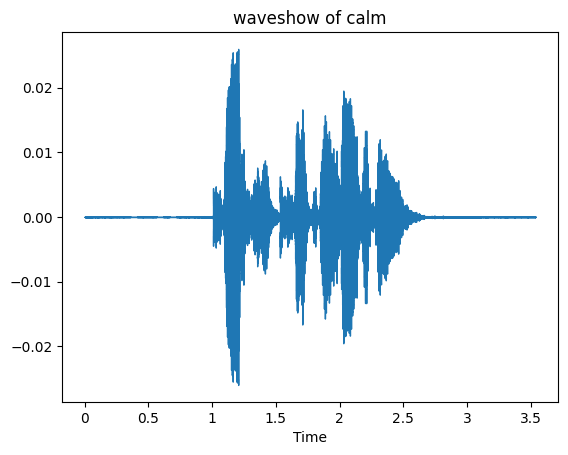

In [344]:
calm_speech = df[df["label"] == "calm"]
path = calm_speech["speech"].iloc[0]
y,s=librosa.load(path)
librosa.display.waveshow(y ,sr=s)
plt.title("waveshow of calm")

In [345]:
Audio(path)

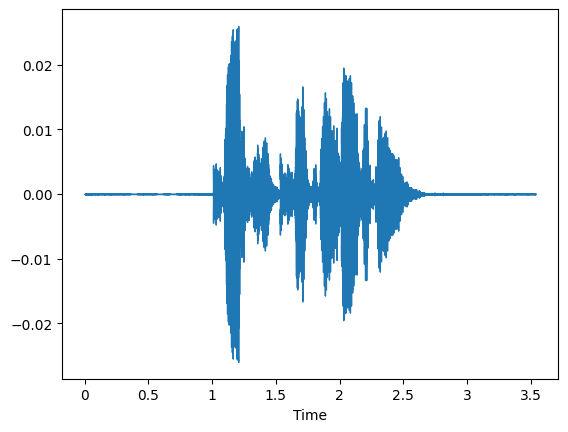

In [346]:
happy_speech = df[df["label"] == "happy"]
path = happy_speech["speech"].iloc[0]

librosa.display.waveshow(y,sr=s)

In [347]:
Audio(path)

In [348]:

calm_speech = df[df["label"] == "calm"]
path = calm_speech["speech"].iloc[0]
y,s=librosa.load(path)
x=librosa.stft(y)
xdb=librosa.amplitude_to_db(abs(x))
xdb

array([[-67.52847 , -59.70333 , -59.322605, ..., -67.52847 , -67.52847 ,
        -67.52847 ],
       [-67.52847 , -61.419807, -64.775764, ..., -67.52847 , -67.52847 ,
        -67.52847 ],
       [-67.52847 , -60.603226, -64.15877 , ..., -67.52847 , -67.52847 ,
        -67.52847 ],
       ...,
       [-67.52847 , -67.52847 , -67.52847 , ..., -67.52847 , -67.52847 ,
        -67.52847 ],
       [-67.52847 , -67.52847 , -67.52847 , ..., -67.52847 , -67.52847 ,
        -67.52847 ],
       [-67.52847 , -67.52847 , -67.52847 , ..., -67.52847 , -67.52847 ,
        -67.52847 ]], dtype=float32)

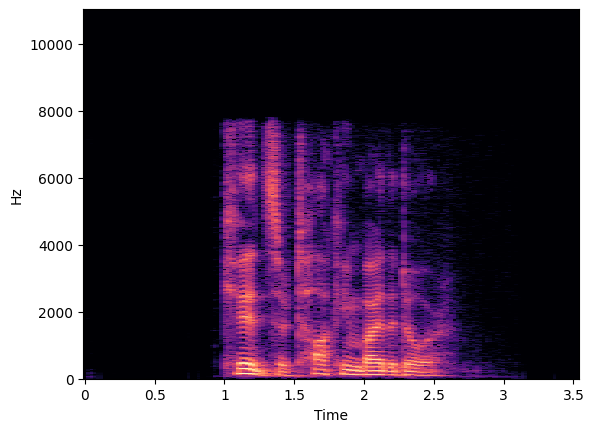

In [349]:
librosa.display.specshow(xdb,sr=s,x_axis="time",y_axis="hz")

# Feature Extraction

In [350]:
def extract_mfcc(filename):
    y,sr=librosa.load(filename, duration=3, offset=0.5)
    mfcc= np.mean(librosa.feature.mfcc(y=y, sr=s, n_mfcc=40).T, axis=0)
    return mfcc

In [351]:
extract_mfcc(df["speech"][0])

array([-6.7856201e+02,  7.7576767e+01, -1.0928226e+01,  2.5414410e+01,
       -3.6407658e-01,  8.3914795e+00, -9.8866520e+00,  4.6216044e-01,
       -1.5446872e+01, -2.5478504e+00,  1.2006501e+00, -5.0549068e+00,
        4.2883315e+00, -6.9445438e+00,  3.1226976e+00, -1.6553175e+00,
       -2.7319124e+00, -4.1626220e+00, -4.4313258e-01, -2.0809019e+00,
       -6.7528963e+00, -8.1966615e-01, -2.9237857e+00, -5.0759110e+00,
       -2.2398493e+00, -8.6857349e-01, -5.6040969e+00, -1.7035113e-01,
       -1.9209820e+00, -7.6025355e-01, -1.1691678e+00, -3.7968590e+00,
       -1.7514008e+00, -3.6691167e+00, -2.3234389e+00, -3.1901412e+00,
        5.5933286e-02, -3.2892170e+00, -3.1629043e+00, -2.4840744e+00],
      dtype=float32)

In [352]:
x_mfcc=df["speech"].apply(lambda x: extract_mfcc(x))

In [353]:
x_mfcc

0       [-678.562, 77.57677, -10.928226, 25.41441, -0....
1       [-669.3056, 76.37306, -15.135005, 29.210396, -...
2       [-670.1048, 78.264435, -12.059117, 24.98663, -...
3       [-666.8262, 78.110374, -9.36618, 26.95631, -2....
4       [-703.5392, 85.964775, -10.271956, 29.001057, ...
                              ...                        
1435    [-567.5831, 46.695198, -37.52629, 13.526846, -...
1436    [-489.2282, 73.172264, -41.90515, 12.4101095, ...
1437    [-495.93076, 64.59486, -48.24469, 17.887081, -...
1438    [-466.1084, 59.038635, -35.32733, 27.677193, -...
1439    [-502.89093, 59.06375, -25.848553, 18.274448, ...
Name: speech, Length: 1440, dtype: object

In [354]:
x_mfcc.shape

(1440,)

In [355]:
X=[x for x in x_mfcc]
X=np.array(X)
X.shape

(1440, 40)

In [356]:
X=np.expand_dims(X,-1)
X.shape

(1440, 40, 1)

In [357]:
X

array([[[-6.7856201e+02],
        [ 7.7576767e+01],
        [-1.0928226e+01],
        ...,
        [-3.2892170e+00],
        [-3.1629043e+00],
        [-2.4840744e+00]],

       [[-6.6930560e+02],
        [ 7.6373062e+01],
        [-1.5135005e+01],
        ...,
        [-4.4139910e+00],
        [-3.0610540e+00],
        [-3.1942549e+00]],

       [[-6.7010480e+02],
        [ 7.8264435e+01],
        [-1.2059117e+01],
        ...,
        [-3.8938415e+00],
        [-3.7733877e+00],
        [-3.0214431e+00]],

       ...,

       [[-4.9593076e+02],
        [ 6.4594856e+01],
        [-4.8244690e+01],
        ...,
        [-2.6335158e+00],
        [ 3.9511111e-01],
        [-1.2725437e+00]],

       [[-4.6610840e+02],
        [ 5.9038635e+01],
        [-3.5327332e+01],
        ...,
        [-1.6251080e+00],
        [ 4.5700189e-01],
        [ 2.5070073e-02]],

       [[-5.0289093e+02],
        [ 5.9063751e+01],
        [-2.5848553e+01],
        ...,
        [-2.5068631e+00],
        [-2.451

In [358]:
from sklearn.preprocessing import OneHotEncoder

In [359]:
enc=OneHotEncoder()
y=enc.fit_transform(df[['label']])
y


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1440 stored elements and shape (1440, 8)>

In [360]:
y=y.toarray()

In [361]:
y.shape

(1440, 8)

# Creating LSTM model

In [362]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [363]:
model=Sequential(
    [
        LSTM(123, return_sequences=False, input_shape=(40,1)),
        Dense(64, activation="relu"),
        Dropout(0.2),
        Dense(32, activation="relu"),
        Dropout(0.2),
        Dense(8, activation="softmax")
    ]
)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

c:\Users\Aman\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [364]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 123)            │        61,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 64)             │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 8)              │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,780 (280.39 KB)

 Trainable params: 71,780 (280.39 KB)

 Non-trainable params: 0 (0.00 B)

In [365]:
history=model.fit(X,y, validation_split=0.2, epochs=300, batch_size=512, shuffle=True)

Epoch 1/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 222ms/step - accuracy: 0.1537 - loss: 2.0783 - val_accuracy: 0.1424 - val_loss: 2.0661
Epoch 2/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.1767 - loss: 2.0668 - val_accuracy: 0.1458 - val_loss: 2.0627
Epoch 3/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.1682 - loss: 2.0518 - val_accuracy: 0.1319 - val_loss: 2.0613
Epoch 4/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.1715 - loss: 2.0494 - val_accuracy: 0.1285 - val_loss: 2.0571
Epoch 5/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.1663 - loss: 2.0500 - val_accuracy: 0.1319 - val_loss: 2.0515
Epoch 6/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.1742 - loss: 2.0296 - val_accuracy: 0.1493 - val_loss: 2.0456
Epoch 7/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.1935 - loss: 2.0180 - val_accuracy: 0.1562 - val_loss: 2.0412
Epoch 8/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.2090 - loss: 2.0093 - val_accuracy: 0.1528 - v

In [366]:
# pip install sounddevice

In [367]:
# pip unistall moviepy

In [376]:
from moviepy import AudioFileClip

# Load the MP4 file
audio_clip = AudioFileClip(r'C:\Users\Aman\OneDrive\Documents\Coding\Python\Speech Emotion Recognition\data\Actor_22\03-01-04-01-02-02-22.wav')

# Export the audio to WAV format
audio_clip.write_audiofile("output_audio.wav")


MoviePy - Writing audio in output_audio.wav


MoviePy - Done.


In [377]:
import numpy as np
import librosa

# Extract MFCC features from the new audio
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=7, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)  # Extract 40 MFCC coefficients
    return mfcc

# Extract MFCC from the recorded audio
mfcc_features_voice = extract_mfcc("output_audio.wav")

# Reshape the features for the model (expects 3D input: [batch_size, timesteps, features])
mfcc_features_voice = np.reshape(mfcc_features_voice, (1,40, 1))  # 1 sample, 40 timesteps, 1 feature


# Predict the emotion from the audio
emotion_pred = model.predict(mfcc_features_voice)

# Get the emotion with the highest probability (index of predicted class)
predicted_class = np.argmax(emotion_pred, axis=1)

# Emotion classes
emotions = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']

# Map the predicted class index to the corresponding emotion
predicted_emotion = emotions[predicted_class[0]]

# Print the predicted emotion
print(f'Predicted Emotion: {predicted_emotion}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Emotion: calm


In [378]:
emotion_pred

array([[1.7878996e-02, 7.8819013e-01, 4.7818571e-02, 5.7325896e-04,
        1.1664838e-01, 7.3035539e-05, 2.8817529e-02, 1.4118955e-07]],
      dtype=float32)

In [ ]:
# import numpy as np
# import librosa
# from keras.models import Sequential, load_model
# from keras.layers import LSTM, Dense, Dropout
# from sklearn.preprocessing import OneHotEncoder
# import os
# import glob
# import pandas as pd

# # Dictionary for emotions corresponding to file names
# emotions = {
#     '01': 'neutral',
#     '02': 'calm',
#     '03': 'happy',
#     '04': 'sad',
#     '05': 'angry',
#     '06': 'fearful',
#     '07': 'disgust',
#     '08': 'surprised'
# }

# # Load dataset and extract MFCCs
# x, y = [], []
# for file in glob.glob(r'C:\Users\Aman\OneDrive\Documents\Coding\Python\Speech Emotion Recognition\data\Actor_*\*.wav'):
#     file_name = os.path.basename(file)
#     emotion = emotions[file_name.split("-")[2]]
#     x.append(file)
#     y.append(emotion)

# # Create DataFrame
# df = pd.DataFrame()
# df["speech"] = x
# df["label"] = y

# # Extract MFCC features
# def extract_mfcc(filename):
#     y, sr = librosa.load(filename, duration=3, offset=0.5)
#     mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)  # Extract 40 MFCC coefficients
#     return mfcc

# # Apply MFCC extraction for all files
# x_mfcc = df["speech"].apply(lambda x: extract_mfcc(x))
# X = np.array([x for x in x_mfcc if not np.any(np.isnan(x))])  # Filter out NaN MFCC samples
# X = np.expand_dims(X, -1)  # Reshape for the LSTM model

# # One-hot encode labels
# enc = OneHotEncoder(sparse_output=False)
# y = enc.fit_transform(df[['label']])

# # Check for NaN values in X or y before training
# if np.any(np.isnan(X)):
#     print("NaN values found in MFCC features.")
# if np.any(np.isnan(y)):
#     print("NaN values found in labels.")

# # Build LSTM Model
# model = Sequential([
#     LSTM(123, return_sequences=False, input_shape=(40, 1)),
#     Dense(64, activation="relu"),
#     Dropout(0.2),
#     Dense(32, activation="relu"),
#     Dropout(0.2),
#     Dense(8, activation="softmax")
# ])

# model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

# # Train the model
# history = model.fit(X, y, validation_split=0.2, epochs=300, batch_size=512, shuffle=True)

# # Save the model
# model.save('emotion_model.h5')

# # Load the model (for inference)
# model = load_model('emotion_model.h5')



# # Function to extract MFCC from the new audio file for prediction
# def extract_mfcc_from_new_audio(filename):
#     y, sr = librosa.load(filename, duration=3, offset=0.5)
#     mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)  # Extract 40 MFCC coefficients
#     return mfcc

# # Extract MFCC features from the new audio
# mfcc_features_voice = extract_mfcc_from_new_audio(r'C:\Users\Aman\OneDrive\Documents\Coding\Python\Speech Emotion Recognition\data\Actor_22\03-01-04-01-02-02-22.wav')

# # Reshape the features for the model (expects input of shape [batch_size, timesteps, features])
# mfcc_features_voice = np.reshape(mfcc_features_voice, (1, 40, 1))  # 1 sample, 40 timesteps, 1 feature

# # Ensure the data type is float32
# mfcc_features_voice = np.array(mfcc_features_voice, dtype=np.float32)

# # Predict the emotion from the audio
# emotion_pred = model.predict(mfcc_features_voice)

# # Get the emotion with the highest probability (index of predicted class)
# predicted_class = np.argmax(emotion_pred, axis=1)

# # Emotion classes (should be the same order as in training)
# emotions = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']

# # Map the predicted class index to the corresponding emotion
# predicted_emotion = emotions[predicted_class[0]]

# # Print the predicted emotion
# print(f'Predicted Emotion: {predicted_emotion}')


Epoch 1/300


c:\Users\Aman\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 211ms/step - accuracy: 0.1291 - loss: 2.0751 - val_accuracy: 0.1319 - val_loss: 2.0642
Epoch 2/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.1777 - loss: 2.0586 - val_accuracy: 0.1528 - val_loss: 2.0566
Epoch 3/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.1730 - loss: 2.0515 - val_accuracy: 0.1493 - val_loss: 2.0493
Epoch 4/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.1838 - loss: 2.0414 - val_accuracy: 0.1424 - val_loss: 2.0452
Epoch 5/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.2011 - loss: 2.0341 - val_accuracy: 0.1667 - val_loss: 2.0408
Epoch 6/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.1758 - loss: 2.0282 - val_accuracy: 0.1771 - val_loss: 2.0332
Epoch 7/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.2086 - loss: 2.0090 - val_accuracy: 0.1875 - val_loss: 2.0221
Epoch 8/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.2094 - loss: 2.0096 - val_accuracy: 0.2014 - val_loss: 2.0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
Predicted Emotion: happy
